<h1> A/B Testing of a marketing dataset <h1>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv('marketing_AB.csv')

In [3]:
# Inspect the first few rows
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Let's check out the datatypes in our dataset
df.dtypes

Unnamed: 0        int64
user id           int64
test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [5]:
# Let's check if we have any duplicate user ID's
df.duplicated(subset = 'user id').sum()

0

No duplicates which is good

In [6]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0', 'user id'], axis=1, inplace = True)

In [7]:
# Let's check if our categorical variables have appropriate unique values
df_cat = df[['test group', 'converted', 'most ads day', 'most ads hour']]
df_cat.nunique()


test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

Good - we have the expected number of unique values for each of our  categorical columns

In [8]:
for i in df_cat:
    print(i.upper(), ":", df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


Good - we also have the values we would expect for each of these columns

<h2>Univariate Analysis <h2>

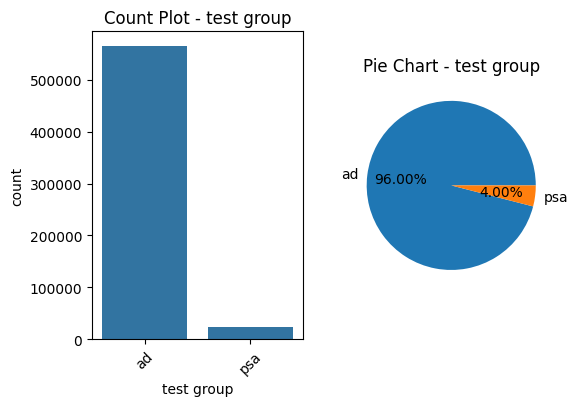

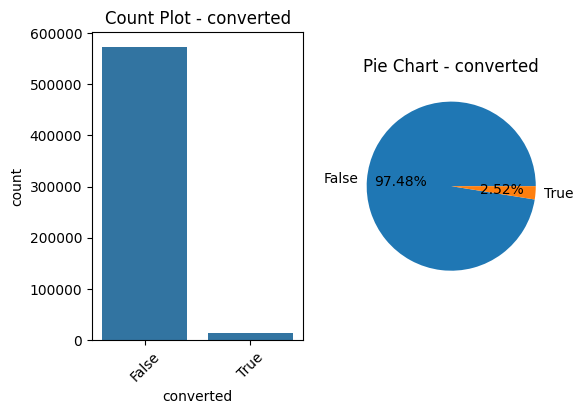

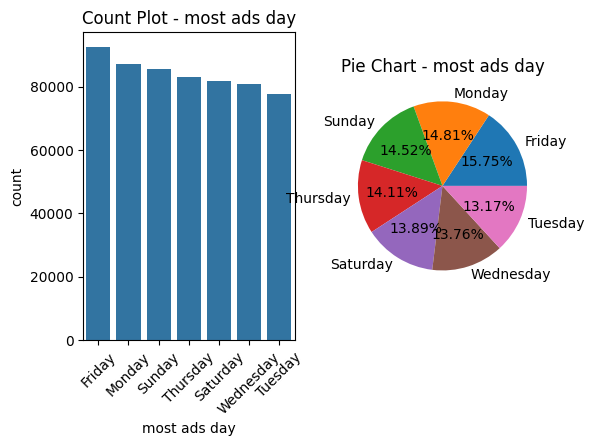

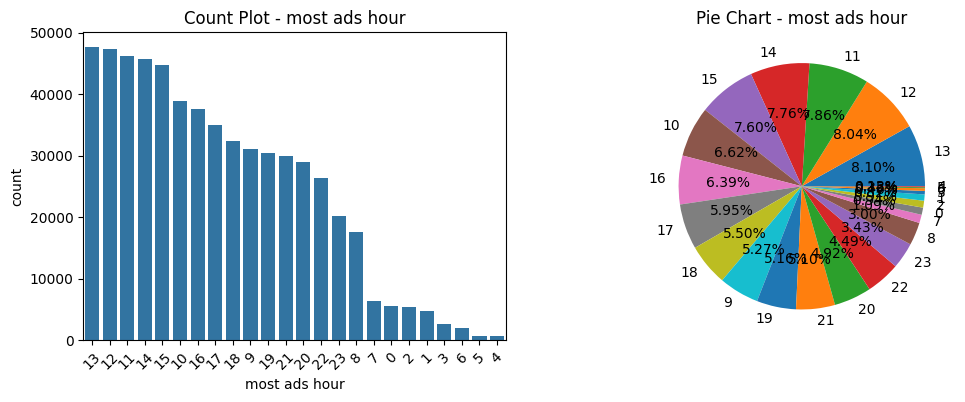

In [9]:
for var in df_cat.columns:
    variable = var
    if var == 'most ads hour':
        plt.figure(figsize = (12,4))
    else:
        plt.figure(figsize = (6,4))
    plt.subplot(1,2,1)
    sns.countplot(x=variable, data=df_cat, order = df_cat[var].value_counts().index)
    plt.title(f'Count Plot - {variable}')
    if df_cat[var].dtype == 'object' or df_cat[var].dtype == 'bool':
        plt.xticks(rotation=45)
    elif df_cat[var].dtype == 'int64':
        plt.xticks(rotation=45)

    plt.subplot(1,2,2)
    counts = df_cat[variable].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
    plt.title(f'Pie Chart - {variable}')


Text(0.5, 1.0, 'Box plot - total ads')

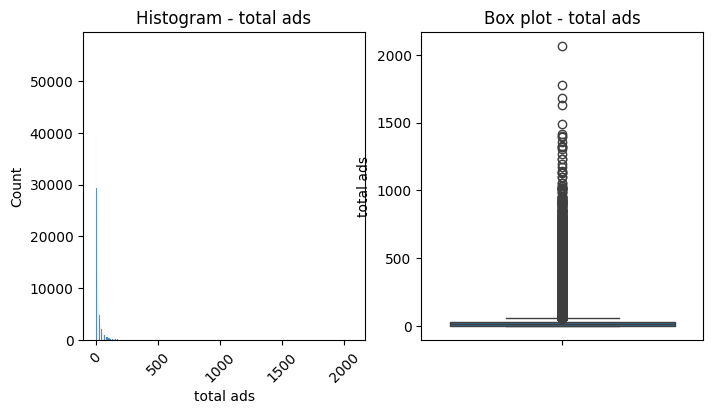

In [10]:

variable = 'total ads'
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f'Histogram - {variable}')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(y=variable, data = df)
plt.title(f'Box plot - {variable}')

In [11]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

We can see that most of the values in the total ads column are between 1 and 27. In order to make our histogram more readable, I will only show users who were shown 50 ads or less. This is a comprehensive enough range to include almost all users, while making the histogram much more readable

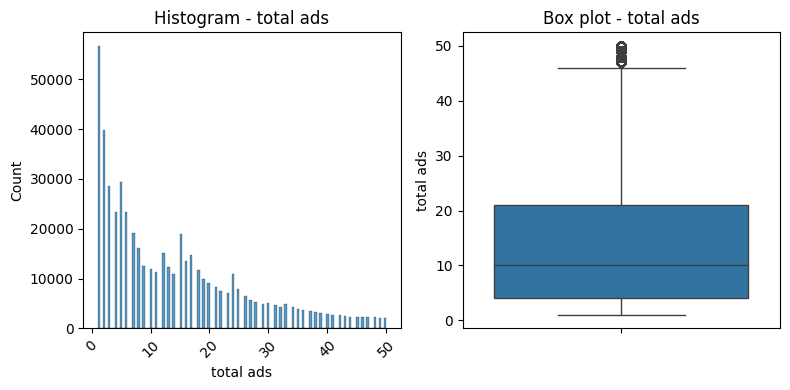

In [12]:
variable = 'total ads'
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df['total ads'] < 51])
plt.title(f'Histogram - {variable}')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(y=variable, data = df[df['total ads'] < 51])
plt.title(f'Box plot - {variable}')
plt.tight_layout()
plt.show()

<h2> Bivariate Analysis <h2>

In [13]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


We can see that 2.5% of people who have seen the ad have made a purchase while 1.7% of people who had only seen the general announcement had made a purchase

<Axes: xlabel='test group'>

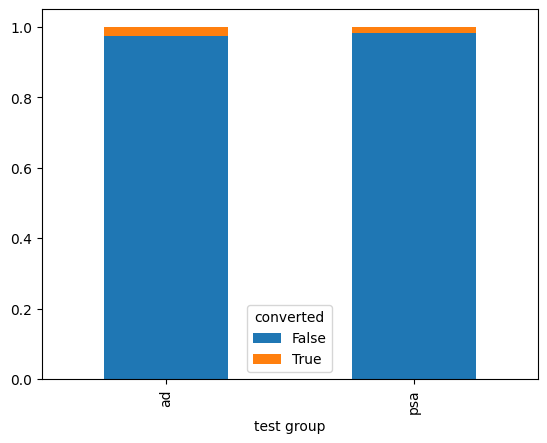

In [14]:
ct_conversion_test_group.plot.bar(stacked=True)

converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


<Axes: xlabel='most ads day'>

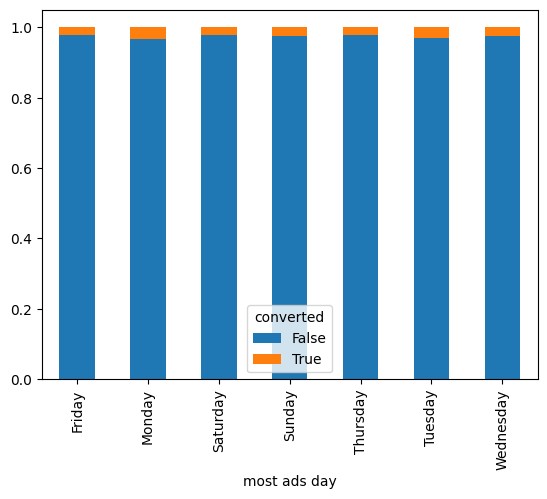

In [15]:
ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by=True, ascending=False))
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

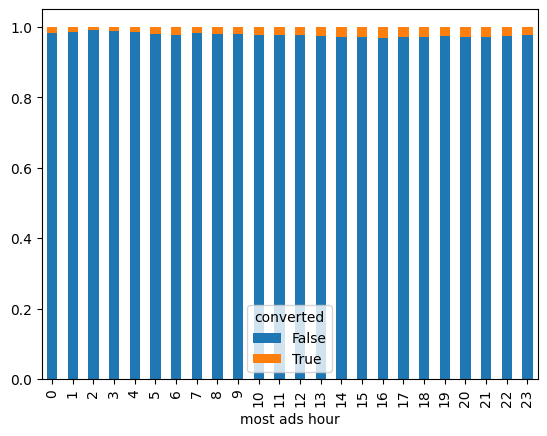

In [16]:
ct_conversion_hour = pd.crosstab(df['most ads hour'], df['converted'], normalize='index')
print(ct_conversion_hour.sort_values(by=True, ascending=False))
ct_conversion_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

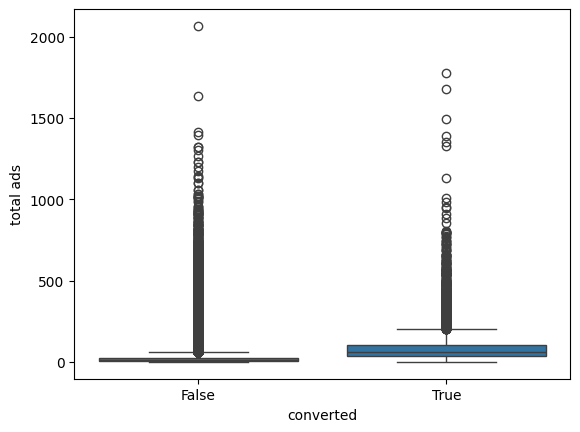

In [17]:
sns.boxplot(x= 'converted', y= 'total ads', data = df)

<Axes: xlabel='converted', ylabel='total ads'>

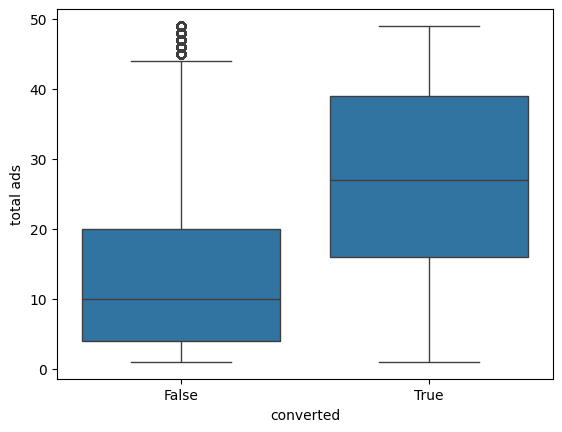

In [18]:
sns.boxplot(x= 'converted', y= 'total ads', data = df[df['total ads'] < 50])

<h2> Statistical Analysis <h2>

In [19]:
from scipy.stats import chi2_contingency

alpha = 0.05

for variable in df_cat.columns:
    if variable != 'converted':
        # Create a contigency table
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])

        # Perform chi-squared test on each table
        chi2, p, _,_ = chi2_contingency(contingency_table)

        #Display results of Chi-squared test
        print(f"\nChi-squared test for {variable} vs converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        # Check for significant differences
        if p < alpha:
            print(f"The difference in conversion rates across {variable} is statistically significant.")
        else:
            print(f"There is no significant difference in conversion rates across {variable}.")


Chi-squared test for test group vs converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statistically significant.

Chi-squared test for most ads day vs converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statistically significant.

Chi-squared test for most ads hour vs converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statistically significant.


In [22]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Check assumptions
    # Normality assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])

print(f"Shapiro-Wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-Wilk test for normality (False group): p-value = {shapiro_p_value_false}")

# Equality of variances assumption
levene_stat, levene_p_value = levene(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

/var/folders/fw/qtbwb19n101_zm4fctdcxdw80000gn/T/ipykernel_14090/1192339928.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14843.
  shapiro_stat_true, shapiro_p_value_true = shapiro(df[df['converted'] == True]['total ads'])
/var/folders/fw/qtbwb19n101_zm4fctdcxdw80000gn/T/ipykernel_14090/1192339928.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 573258.
  shapiro_stat_false, shapiro_p_value_false = shapiro(df[df['converted'] == False]['total ads'])


Shapiro-Wilk test for normality (True group): p-value = 1.638680987007771e-98
Shapiro-Wilk test for normality (False group): p-value = 9.883049430735801e-204
Levene's test for equality of variances: p-value = 0.0


In [23]:
alpha = 0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    #Assumptions have been met - use t-test for means
    t_stat, t_p_value = ttest_ind(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Independent two-sample t_test: p_value = {t_p_value}")
else:
    # Assumptions not met - use Mann-Whitney U test for medians
    u_stat, u_p_value = mannwhitneyu(df[df['converted']]['total ads'], df[~df['converted']]['total ads'])
    print(f"Mann-Whitney U test: p-value = {u_p_value}")

Mann-Whitney U test: p-value = 0.0


We can conclude that the conversion status of people is influenced by the median number of ads that they see. The more ads a user sees, the more likely they are to make a purchase. We saw this visually and confirmed this statistically. Almost all factors were critical to conversion rate - the hour of day / day of the week an ad was shown to a user, and how. many ads the user was shown.